In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report  
from sklearn.metrics import confusion_matrix


In [17]:
bank = pd.read_csv("C:\\ExcelR\\Data Science Assignments\\6-Logistic Regression\\bank-full.csv",sep=';')

In [18]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [19]:
# converting all yes/no to 1/0
bank.y.replace(('yes','no'),(1,0),inplace=True)
bank.default.replace(('yes','no'),(1,0),inplace=True)
bank.housing.replace(('yes','no'),(1,0),inplace=True)
bank.loan.replace(('yes','no'),(1,0),inplace=True)

In [21]:
# creating dummies for object data
bank = pd.get_dummies(bank)
bank.head(5)

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,5,261,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
1,44,0,29,1,0,5,151,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
2,33,0,2,1,1,5,76,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
3,47,0,1506,1,0,5,92,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
4,33,0,1,0,0,5,198,1,-1,0,...,0,0,1,0,0,0,0,0,0,1


In [22]:
#Checking for na values
bank.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 49 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  45211 non-null  int64
 1   default              45211 non-null  int64
 2   balance              45211 non-null  int64
 3   housing              45211 non-null  int64
 4   loan                 45211 non-null  int64
 5   day                  45211 non-null  int64
 6   duration             45211 non-null  int64
 7   campaign             45211 non-null  int64
 8   pdays                45211 non-null  int64
 9   previous             45211 non-null  int64
 10  y                    45211 non-null  int64
 11  job_admin.           45211 non-null  uint8
 12  job_blue-collar      45211 non-null  uint8
 13  job_entrepreneur     45211 non-null  uint8
 14  job_housemaid        45211 non-null  uint8
 15  job_management       45211 non-null  uint8
 16  job_retired          4

In [23]:
# checking for duplicates
bank[bank.duplicated()]


,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown


<AxesSubplot:xlabel='y'>

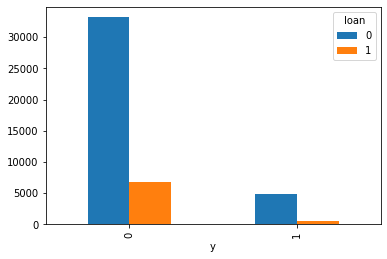

In [24]:
pd.crosstab(bank.y,bank.loan).plot(kind = 'bar')


<AxesSubplot:xlabel='y'>

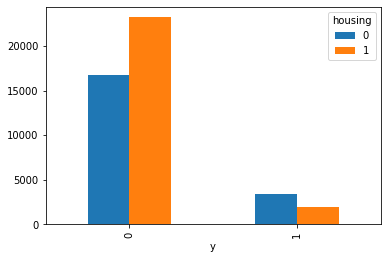

In [25]:
pd.crosstab(bank.y,bank.housing ).plot(kind = 'bar')


<AxesSubplot:xlabel='housing', ylabel='count'>

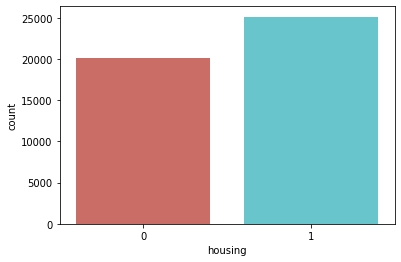

In [26]:
sns.countplot(x="housing",data=bank,palette="hls")


<AxesSubplot:xlabel='y'>

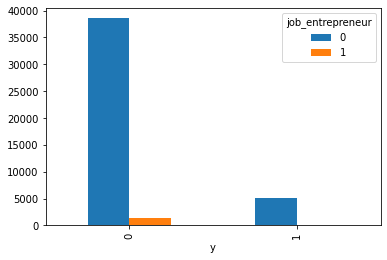

In [27]:
pd.crosstab(bank.y,bank.job_entrepreneur).plot(kind = 'bar')


<AxesSubplot:xlabel='y'>

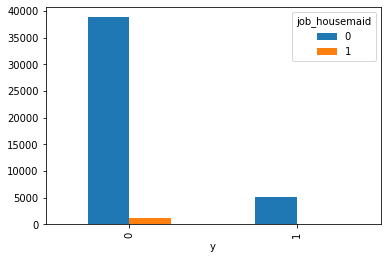

In [28]:
pd.crosstab(bank.y,bank.job_housemaid ).plot(kind = 'bar')


In [29]:
#Dividing the dataset into X and Y variables
X = bank.loc[:,bank.columns!='y']
Y = np.ravel(bank.loc[:,bank.columns=='y'])


In [30]:
X

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,5,261,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
1,44,0,29,1,0,5,151,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
2,33,0,2,1,1,5,76,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
3,47,0,1506,1,0,5,92,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
4,33,0,1,0,0,5,198,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,17,977,3,-1,0,...,0,0,0,1,0,0,0,0,0,1
45207,71,0,1729,0,0,17,456,2,-1,0,...,0,0,0,1,0,0,0,0,0,1
45208,72,0,5715,0,0,17,1127,5,184,3,...,0,0,0,1,0,0,0,0,1,0
45209,57,0,668,0,0,17,508,4,-1,0,...,0,0,0,1,0,0,0,0,0,1


In [31]:
Y

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [32]:
# Model building 
model = LogisticRegression()
model.fit(X,Y)


C:\Users\theam\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [33]:
model.coef_  # coefficients of features


array([[-1.41346797e-03, -5.48159086e-02,  1.26564963e-05,
        -6.79035154e-01, -4.26370861e-01,  9.16506229e-03,
         4.18743654e-03, -9.07088650e-02, -8.92863070e-05,
         9.76929799e-03,  5.89915449e-02, -2.57244051e-01,
        -3.00022190e-01, -3.92140720e-01, -1.08645062e-01,
         3.40189931e-01, -2.49156935e-01, -1.64876763e-01,
         4.15910150e-01, -1.22245715e-01, -1.29174234e-01,
        -1.20459055e-01, -3.24710159e-01, -4.78848924e-01,
        -2.25314016e-01, -4.65148387e-01, -2.74961419e-01,
        -8.63212890e-02, -2.02442005e-01,  2.45085269e-01,
         1.03224555e-01, -1.37718292e+00, -1.14088934e-01,
        -7.89323065e-01,  4.13516284e-01, -2.60154349e-01,
        -1.28162891e+00, -9.43838075e-01,  3.39713090e-01,
         1.49636385e+00, -5.17113380e-01, -9.61115710e-01,
         8.16542682e-01,  7.72253420e-01, -8.54175440e-01,
        -6.38617990e-01,  1.41017203e+00, -9.46251701e-01]])

In [34]:
#Predict for X dataset
y_pred = model.predict(X)
y_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [35]:
bank["y_pred"] = y_pred
bank.head(5)

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y_pred
0,58,0,2143,1,0,5,261,1,-1,0,...,0,1,0,0,0,0,0,0,1,0
1,44,0,29,1,0,5,151,1,-1,0,...,0,1,0,0,0,0,0,0,1,0
2,33,0,2,1,1,5,76,1,-1,0,...,0,1,0,0,0,0,0,0,1,0
3,47,0,1506,1,0,5,92,1,-1,0,...,0,1,0,0,0,0,0,0,1,0
4,33,0,1,0,0,5,198,1,-1,0,...,0,1,0,0,0,0,0,0,1,0


In [36]:
y_pred_df= pd.DataFrame({'actual': Y,'predicted': y_pred})
y_pred_df.head()

,actual,predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [37]:
y_prob = pd.DataFrame(model.predict_proba(X.iloc[:,:]))
new_df = pd.concat([bank,y_prob],axis=1)
new_df.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y_pred,0,1
0,58,0,2143,1,0,5,261,1,-1,0,...,0,0,0,0,0,0,1,0,0.985642,0.014358
1,44,0,29,1,0,5,151,1,-1,0,...,0,0,0,0,0,0,1,0,0.990485,0.009515
2,33,0,2,1,1,5,76,1,-1,0,...,0,0,0,0,0,0,1,0,0.996987,0.003013
3,47,0,1506,1,0,5,92,1,-1,0,...,0,0,0,0,0,0,1,0,0.994480,0.005520
4,33,0,1,0,0,5,198,1,-1,0,...,0,0,0,0,0,0,1,0,0.975396,0.024604


In [38]:
# Confusion Matrix for the model accuracy
confusion_matrix = confusion_matrix(Y,y_pred)
print (confusion_matrix)


[[38942   980]
 [ 3454  1835]]


In [39]:
pd.crosstab(Y,y_pred)

col_0,0,1
row_0,,
0,38942,980
1,3454,1835


In [42]:
#type(y_pred)
accuracy = sum(Y==y_pred)/bank.shape[0]
accuracy

0.9019265223065184

In [43]:
#Classification report
print(classification_report(Y,y_pred))


              precision    recall  f1-score   support

           0       0.92      0.98      0.95     39922
           1       0.65      0.35      0.45      5289

    accuracy                           0.90     45211
   macro avg       0.79      0.66      0.70     45211
weighted avg       0.89      0.90      0.89     45211



In [44]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
Logit_roc_score=roc_auc_score(Y,model.predict(X))
Logit_roc_score


0.6611993121887358

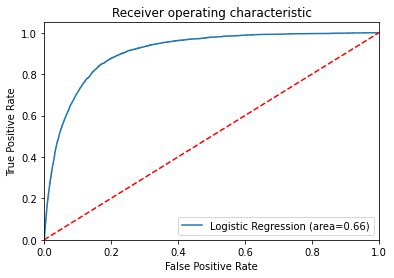

In [45]:
# plotting ROC curve
fpr, tpr, thresholds = roc_curve(Y,model.predict_proba(X)[:,1]) 
plt.plot(fpr, tpr, label='Logistic Regression (area=%0.2f)'% Logit_roc_score)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()
